# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Joshua Weinbrenner 383400
    
    2. Jonas Philipps 377818
    

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [105]:
# imports
import warnings
warnings.filterwarnings(action='once')
import pandas as pd #importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import mean

In [106]:
#read csv
path = "dataset.csv" 
df=pd.read_csv(path, index_col=0) 
#select 95% of data randomly and naming of dataset
sampled_data=df.sample(frac=0.95, random_state=383400)
#export sampled data
sampled_data.to_csv('output_assignment/sampled_data.csv', index=False)

## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

In [107]:
#getting a first look at the data
pd.set_option('display.max_columns', None) #this ensures that all columns get displayed
display(sampled_data.head(15)) #this shows the first 15 entries of the dataframe
display(sampled_data.describe()) #this allows us to display basic statistics of the data


,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY
217500,810997,2015,8,4,2,WN,4429,N902WN,BWI,BOS,1815,1844.0,29.0,19.0,1903.0,90.0,95.0,69.0,369,2012.0,7.0,1945,2019.0,34.0,0,0,N,5.0,0.0,0.0,0.0,29.0,216,30,Evening
594129,124335,2015,2,27,5,DL,2136,N365NB,ATL,ELP,1100,1054.0,-6.0,31.0,1125.0,219.0,240.0,203.0,1282,1248.0,6.0,1239,1254.0,15.0,0,0,N,15.0,0.0,0.0,0.0,0.0,58,8,Morning
271175,120955,2015,7,21,2,WN,3041,N727SW,MSP,MDW,1830,2014.0,104.0,8.0,2022.0,90.0,75.0,60.0,349,2122.0,7.0,2000,2129.0,89.0,0,0,N,0.0,0.0,0.0,89.0,0.0,202,28,Evening
467048,432406,2015,11,27,5,WN,11,N608SW,ABQ,LAX,1730,1813.0,43.0,5.0,1818.0,120.0,125.0,111.0,677,1909.0,9.0,1830,1918.0,48.0,0,0,N,5.0,0.0,11.0,32.0,0.0,331,47,Afternoon
258721,913418,2015,7,6,1,UA,1212,N16713,DEN,IAH,1845,1934.0,49.0,12.0,1946.0,150.0,129.0,112.0,862,2238.0,5.0,2215,2243.0,28.0,0,0,N,0.0,0.0,10.0,18.0,0.0,187,26,Evening
872278,589311,2015,11,21,6,NK,680,N632NK,IAH,MSY,1809,1843.0,34.0,16.0,1859.0,65.0,67.0,46.0,305,1945.0,5.0,1914,1950.0,36.0,0,0,N,2.0,0.0,34.0,0.0,0.0,325,46,Evening
386408,706857,2015,11,26,4,AA,2000,N737US,CLT,RIC,1245,1244.0,-1.0,32.0,1316.0,61.0,83.0,45.0,257,1401.0,6.0,1346,1407.0,21.0,0,0,N,21.0,0.0,0.0,0.0,0.0,330,47,Afternoon
136883,661241,2015,10,27,2,UA,1555,N411UA,IAH,SAN,1502,1543.0,41.0,20.0,1603.0,213.0,198.0,176.0,1303,1659.0,2.0,1635,1701.0,26.0,0,0,N,0.0,0.0,26.0,0.0,0.0,300,42,Afternoon
485198,257285,2015,3,4,3,DL,480,N3773D,JFK,PDX,1634,1706.0,32.0,17.0,1723.0,371.0,378.0,357.0,2454,2020.0,4.0,1945,2024.0,39.0,0,0,N,7.0,0.0,31.0,1.0,0.0,63,9,Afternoon
203189,628782,2015,10,18,7,UA,425,N463UA,SFO,EWR,1454,1556.0,62.0,29.0,1625.0,328.0,333.0,295.0,2565,20.0,9.0,2322,29.0,67.0,0,0,N,5.0,0.0,11.0,51.0,0.0,291,41,Afternoon


,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK
count,893603.000000,893603.0,893603.000000,893603.000000,893603.000000,893603.000000,893603.000000,811883.000000,811883.00000,809149.000000,809149.000000,893598.000000,808342.000000,808342.000000,893603.000000,808342.000000,808342.000000,893603.000000,808342.000000,808342.000000,893603.0,893603.000000,808342.000000,808342.000000,808342.000000,808342.000000,808342.000000,893603.000000,893603.000000
mean,470440.847888,2015.0,6.120280,15.559711,3.847937,2241.318117,1458.841350,1525.551131,54.97145,20.735233,1548.617214,141.199205,146.882365,117.355957,816.060908,1579.206916,8.790360,1611.092953,1575.515628,58.932520,0.0,0.095413,13.489011,0.076379,18.961307,23.495822,2.910001,170.498720,23.927405
std,271546.507463,0.0,3.446538,8.843467,1.994629,1793.667757,460.553121,489.020370,67.45852,14.781166,495.498031,74.516293,77.426786,74.197037,600.983644,598.986563,8.954457,508.765032,611.238352,64.334672,0.0,0.293784,27.999917,2.212235,48.233771,43.217682,20.473365,106.198995,15.182422
min,0.000000,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-32.00000,1.000000,1.000000,18.000000,16.000000,8.000000,21.000000,1.000000,1.000000,1.000000,1.000000,15.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,235206.500000,2015.0,3.000000,8.000000,2.000000,743.000000,1109.000000,1155.000000,17.00000,12.000000,1211.000000,85.000000,90.000000,62.000000,370.000000,1241.000000,4.000000,1250.000000,1239.000000,23.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,10.000000
50%,470509.000000,2015.0,6.000000,16.000000,4.000000,1724.000000,1515.000000,1604.000000,37.00000,16.000000,1620.000000,123.000000,129.000000,99.000000,651.000000,1717.000000,6.000000,1708.000000,1719.000000,37.000000,0.0,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000,167.000000,23.000000
75%,705586.500000,2015.0,9.000000,23.000000,5.000000,3390.000000,1830.000000,1923.000000,70.00000,24.000000,1940.000000,172.000000,181.000000,148.000000,1055.000000,2040.000000,9.000000,2025.000000,2043.000000,70.000000,0.0,0.000000,18.000000,0.000000,19.000000,29.000000,0.000000,251.000000,35.000000
max,940634.000000,2015.0,12.000000,31.000000,7.000000,9855.000000,2359.000000,2400.000000,1988.00000,185.000000,2400.000000,718.000000,766.000000,690.000000,4983.000000,2400.000000,202.000000,2400.000000,2400.000000,1971.000000,0.0,1.000000,1049.000000,573.000000,1971.000000,1294.000000,1211.000000,365.000000,52.000000


#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [108]:
#we use the unique function
print("All cancellation reasons: \n", sampled_data.CANCELLATION_REASON.unique())
#unique values for cancelled flights
print("Cancellation reasons for cancelled flights: \n", 
        sampled_data[(sampled_data["CANCELLED"]==1)].CANCELLATION_REASON.unique())
#unique values where the flights have not been canceled
print("Cancellation reasons for non-cancelled flights: \n", 
        sampled_data[(sampled_data["CANCELLED"]==0)].CANCELLATION_REASON.unique())

All cancellation reasons: 
 ['N' 'B' 'C' 'A' 'D']
Cancellation reasons for cancelled flights: 
 ['B' 'C' 'A' 'D']
Cancellation reasons for non-cancelled flights: 
 ['N']


    Your answer: We see that the unique values for cancellation reason are A,B,C,D and N. For cancelled flights there are 4 different cancellation reasons, namely A,B,C,D. For non cancelled flights the only value is N. It is safe to assume that N stands for "None" as a flight won't be cancelled if there is no reason to do so. This explains the difference.
    

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [109]:
#remove rows with null values
no_null_data=sampled_data.dropna(axis=0, how="any")

print("Cancellation reasons for flights in no_null_data: \n", 
        no_null_data.CANCELLATION_REASON.unique())
#have a quick look to see if the code worked as intended
no_null_data.head(10)

Cancellation reasons for flights in no_null_data: 
 ['N']


,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY
217500,810997,2015,8,4,2,WN,4429,N902WN,BWI,BOS,1815,1844.0,29.0,19.0,1903.0,90.0,95.0,69.0,369,2012.0,7.0,1945,2019.0,34.0,0,0,N,5.0,0.0,0.0,0.0,29.0,216,30,Evening
594129,124335,2015,2,27,5,DL,2136,N365NB,ATL,ELP,1100,1054.0,-6.0,31.0,1125.0,219.0,240.0,203.0,1282,1248.0,6.0,1239,1254.0,15.0,0,0,N,15.0,0.0,0.0,0.0,0.0,58,8,Morning
271175,120955,2015,7,21,2,WN,3041,N727SW,MSP,MDW,1830,2014.0,104.0,8.0,2022.0,90.0,75.0,60.0,349,2122.0,7.0,2000,2129.0,89.0,0,0,N,0.0,0.0,0.0,89.0,0.0,202,28,Evening
467048,432406,2015,11,27,5,WN,11,N608SW,ABQ,LAX,1730,1813.0,43.0,5.0,1818.0,120.0,125.0,111.0,677,1909.0,9.0,1830,1918.0,48.0,0,0,N,5.0,0.0,11.0,32.0,0.0,331,47,Afternoon
258721,913418,2015,7,6,1,UA,1212,N16713,DEN,IAH,1845,1934.0,49.0,12.0,1946.0,150.0,129.0,112.0,862,2238.0,5.0,2215,2243.0,28.0,0,0,N,0.0,0.0,10.0,18.0,0.0,187,26,Evening
872278,589311,2015,11,21,6,NK,680,N632NK,IAH,MSY,1809,1843.0,34.0,16.0,1859.0,65.0,67.0,46.0,305,1945.0,5.0,1914,1950.0,36.0,0,0,N,2.0,0.0,34.0,0.0,0.0,325,46,Evening
386408,706857,2015,11,26,4,AA,2000,N737US,CLT,RIC,1245,1244.0,-1.0,32.0,1316.0,61.0,83.0,45.0,257,1401.0,6.0,1346,1407.0,21.0,0,0,N,21.0,0.0,0.0,0.0,0.0,330,47,Afternoon
136883,661241,2015,10,27,2,UA,1555,N411UA,IAH,SAN,1502,1543.0,41.0,20.0,1603.0,213.0,198.0,176.0,1303,1659.0,2.0,1635,1701.0,26.0,0,0,N,0.0,0.0,26.0,0.0,0.0,300,42,Afternoon
485198,257285,2015,3,4,3,DL,480,N3773D,JFK,PDX,1634,1706.0,32.0,17.0,1723.0,371.0,378.0,357.0,2454,2020.0,4.0,1945,2024.0,39.0,0,0,N,7.0,0.0,31.0,1.0,0.0,63,9,Afternoon
203189,628782,2015,10,18,7,UA,425,N463UA,SFO,EWR,1454,1556.0,62.0,29.0,1625.0,328.0,333.0,295.0,2565,20.0,9.0,2322,29.0,67.0,0,0,N,5.0,0.0,11.0,51.0,0.0,291,41,Afternoon


    Your answer: Now only one cancellation reason remains: N. This is normal because when a flight is cancelled there are some colums which get null values, for instance Airline delay or weather delay. As these flights never took place it would be illogical for them to have values for different delay categories.
    

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

In [110]:
#first we filter via the airline name in order to be able to get a first glance at the data 
# so that we don't end up with an empty dataset
# we know that we could filter via airline and hours of delay at the same time. But because at first we had
#problems we seperated the filter process in 2 steps in order to debug
ev_data_full=no_null_data[(no_null_data.AIRLINE=="EV")]
ev_data_full.head(5)

,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY
170707,651689,2015,8,4,2,EV,5098,N859AS,AGS,ATL,1642,1706.0,24.0,13.0,1719.0,54.0,49.0,32.0,143,1751.0,4.0,1736,1755.0,19.0,0,0,N,0.0,0.0,0.0,19.0,0.0,216,30,Afternoon
916928,879727,2015,10,4,7,EV,5238,N843AS,CAE,ATL,1300,1446.0,106.0,12.0,1458.0,66.0,60.0,41.0,192,1539.0,7.0,1406,1546.0,100.0,0,0,N,0.0,0.0,100.0,0.0,0.0,277,39,Afternoon
441609,642681,2015,6,30,2,EV,6076,N12552,ORD,LNK,1914,2036.0,82.0,15.0,2051.0,96.0,101.0,81.0,466,2212.0,5.0,2050,2217.0,87.0,0,0,N,5.0,0.0,0.0,82.0,0.0,181,25,Evening
544682,875493,2015,6,22,1,EV,4212,N13550,EWR,MKE,1525,1603.0,38.0,26.0,1629.0,151.0,144.0,114.0,725,1723.0,4.0,1656,1727.0,31.0,0,0,N,0.0,0.0,0.0,31.0,0.0,173,24,Afternoon
209136,164880,2015,3,3,2,EV,4900,N851AS,TYS,ATL,1618,1728.0,70.0,30.0,1758.0,62.0,74.0,40.0,152,1838.0,4.0,1720,1842.0,82.0,0,0,N,12.0,0.0,11.0,59.0,0.0,62,8,Afternoon


In [111]:
#create new data set with delays between 2 to 6 hours
ev_data=ev_data_full[ev_data_full['ARRIVAL_DELAY'].between(120,360)]
ev_data.to_csv('output_assignment/ev_data', index=False)
ev_data.head(5)

,Unnamed: 0.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY
351040,156652,2015,3,5,4,EV,4973,N936EV,GTR,ATL,1605,1811.0,126.0,8.0,1819.0,71.0,68.0,49.0,241,2008.0,11.0,1816,2019.0,123.0,0,0,N,0.0,0.0,123.0,0.0,0.0,64,9,Afternoon
293210,428861,2015,3,4,3,EV,5878,N13550,XNA,IAH,1230,1344.0,74.0,56.0,1440.0,105.0,159.0,94.0,438,1614.0,9.0,1415,1623.0,128.0,0,0,N,54.0,0.0,17.0,0.0,57.0,63,9,Afternoon
780734,663577,2015,11,30,1,EV,2771,N687JS,DFW,BTR,1748,1943.0,115.0,17.0,2000.0,77.0,85.0,63.0,383,2103.0,5.0,1905,2108.0,123.0,0,0,N,8.0,0.0,5.0,110.0,0.0,334,47,Afternoon
323518,532129,2015,7,1,3,EV,2697,N901EV,DFW,BTR,1740,2130.0,230.0,26.0,2156.0,81.0,86.0,55.0,383,2251.0,5.0,1901,2256.0,235.0,0,0,N,5.0,0.0,198.0,32.0,0.0,182,26,Afternoon
273669,180483,2015,12,21,1,EV,4156,N14558,BUF,EWR,1935,2222.0,167.0,8.0,2230.0,89.0,71.0,48.0,282,2318.0,15.0,2104,2333.0,149.0,0,0,N,0.0,0.0,55.0,94.0,0.0,355,50,Evening


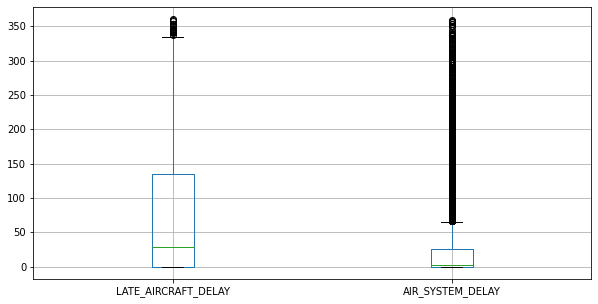

In [112]:
#first create the boxplots in order to get a first view of the data
plt.figure(figsize=(10, 5))
box=ev_data[['LATE_AIRCRAFT_DELAY','AIR_SYSTEM_DELAY']].boxplot()
plt.show()

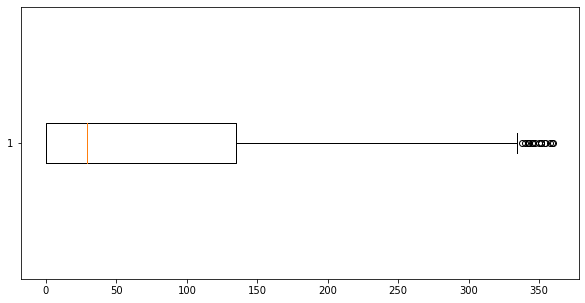

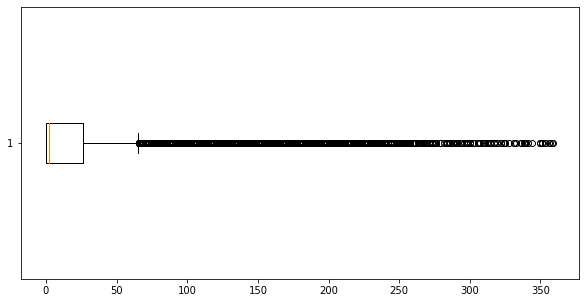

In [113]:
#in order to have access to the specific values we create boxplots for each categorie
#note: we don't care about the plot here
plt.figure(figsize=(10, 5))
box1=plt.boxplot(ev_data['LATE_AIRCRAFT_DELAY'], vert=False)
plt.show()
plt.figure(figsize=(10, 5))
box2=plt.boxplot(ev_data['AIR_SYSTEM_DELAY'], vert=False)
plt.show()

In [114]:
#now get the lower und upper whskers for the respective boxplot
lowerwhisker1=box1["whiskers"][0].get_data()[0].min()
upperwhisker1=box1["whiskers"][1].get_data()[0].max()
lowerwhisker2=box2["whiskers"][0].get_data()[0].min()
upperwhisker2=box2["whiskers"][1].get_data()[0].max()
print("lower-whisker for box 1: " + str(lowerwhisker1))
print("upper-whisker for box 1: " + str(upperwhisker1))
print("lower-whisker for box 2: " + str(lowerwhisker2))
print("upper-whisker for box 2: " + str(upperwhisker2))

lower-whisker for box 1: 0.0
upper-whisker for box 1: 334.0
lower-whisker for box 2: 0.0
upper-whisker for box 2: 65.0


These calculated values for the whiskers seem correct by comparing it to the image.

In [115]:
#based on the calculated whiskers we can create the desired datasets
cleaned_data_late_aircraft=ev_data[ev_data['LATE_AIRCRAFT_DELAY'].between(lowerwhisker1,upperwhisker1)]
cleaned_data_late_aircraft.to_csv('output_assignment/cleaned_data_late_aircraft', index=False)
cleaned_data_air_system=ev_data[ev_data['AIR_SYSTEM_DELAY'].between(lowerwhisker2,upperwhisker2)]
cleaned_data_air_system.to_csv('output_assignment/cleaned_data_air_system', index=False)

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [116]:
col1=ev_data['ARRIVAL_DELAY']   #renaming for better code readability
col2=cleaned_data_late_aircraft['ARRIVAL_DELAY']
col3=cleaned_data_air_system['ARRIVAL_DELAY']
median=[col1.median(),col2.median(),col3.median()]
mean=[col1.mean(),col2.mean(),col3.mean()]
mode=[col1.mode()[0],col2.mode()[0],col3.mode()[0]]
standard_deviation=[col1.std(),col2.std(),col3.std()]
variance=[number**2 for number in standard_deviation]
print("Median:", median, "\n Mean:", mean, "\n Mode:", mode, "\n Standard deviation:", standard_deviation, "\n Variance:", variance)

Median: [165.0, 165.0, 164.0] 
 Mean: [181.63792598379064, 181.32478966934065, 181.14264000935344] 
 Mode: [121.0, 121.0, 123.0] 
 Standard deviation: [54.91823061303766, 54.48555080820847, 54.906434550942095] 
 Variance: [3016.0120536667864, 2968.675246873867, 3014.716555096888]


In [117]:
#the presentation from before is not very good, therefore we use a better way to show the statistical values, a dataframe
import statistics as stats
data1 = col1 #this reassignment is useless but it allowed me to copy from code I had written before
new_stats1 = [stats.median(data1), stats.mean(data1), stats.mode(data1), stats.stdev(data1), stats.variance(data1)]
data2 = col2
new_stats2 = [stats.median(data2), stats.mean(data2), stats.mode(data2), stats.stdev(data2), stats.variance(data2)]
data3 = col3
new_stats3 = [stats.median(data3), stats.mean(data3), stats.mode(data3), stats.stdev(data3), stats.variance(data3)]

In [118]:
#now we create the dataframe
cols = {'ev_data': new_stats1, 'cleaned_data_late_aircraft': new_stats2, 'cleaned_data_air_system': new_stats3 }
df = pd.DataFrame(cols, index = ['median', 'mean', 'mode', 'stdev', 'variance'])
display(df.round(decimals=2))

,ev_data,cleaned_data_late_aircraft,cleaned_data_air_system
median,165.00,165.00,164.00
mean,181.64,181.32,181.14
mode,121.00,121.00,123.00
stdev,54.92,54.49,54.91
variance,3016.01,2968.68,3014.72


    Your answer: First we note that the statistical values are very similar across the three datasets. Secondly, we note that the mean and stdev (and therefore variance) are highest for ev_data. This makes sense as these statistical values are outlier-sensitive and for the cleaned data sets some outliers were removed (the outliers in the cleaned categories have influence on the category arrival delay). At the same time, the fact that these values are very close to each other tells us that we didn't remove too many data entries otherwise the difference in the outlier-sensitive statistical values would be higher.
       This is supported by a look at the different dataframe shapes (see cell below). We see that in cleaned_data_air_system only 19 rows were removed. That's why the statistical values between cleaned_data_air_system and ev_data are very similar.
       Concerning cleaned_data_late_aircraft, we see that more rows got removed (more outliers) and this explains why the decrease for mean and stdev is more significant.
    

In [119]:
print(ev_data.shape,cleaned_data_air_system.shape,cleaned_data_late_aircraft.shape)

(10241, 35) (8553, 35) (10222, 35)


### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

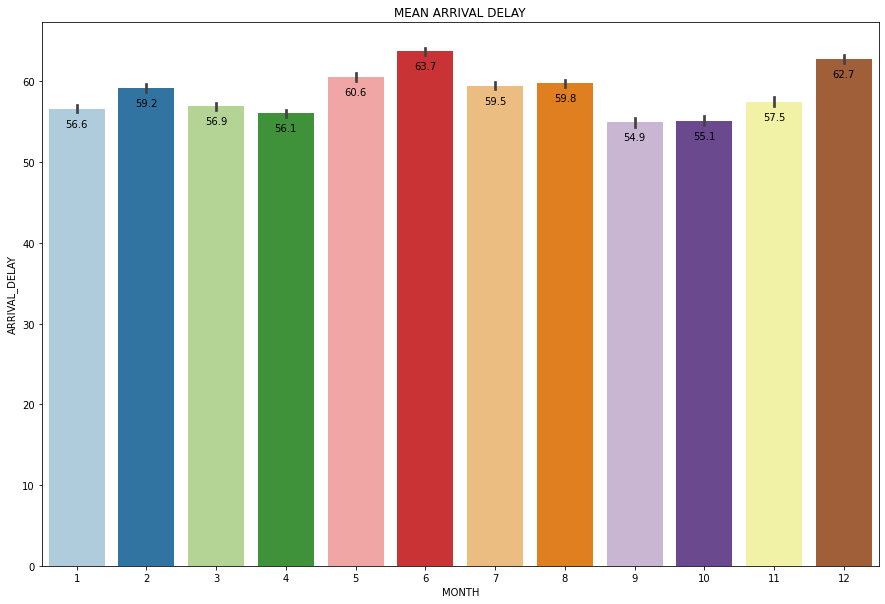

In [120]:
import seaborn as sns 
from numpy import mean
plt.figure(figsize=(15,10))
splot=sns.barplot(x="MONTH", y="ARRIVAL_DELAY", data=no_null_data, estimator=mean, palette=sns.color_palette("Paired"))
splot.set_title('MEAN ARRIVAL DELAY') #add title to the plot
#add annotations to each bar showing the heights of the bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -15), 
                   textcoords = 'offset points')

    Your answer:
    In September and October we expect the least delay and in June and December we expect the most delay. That is, if we base our expectation on the mean. 


#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

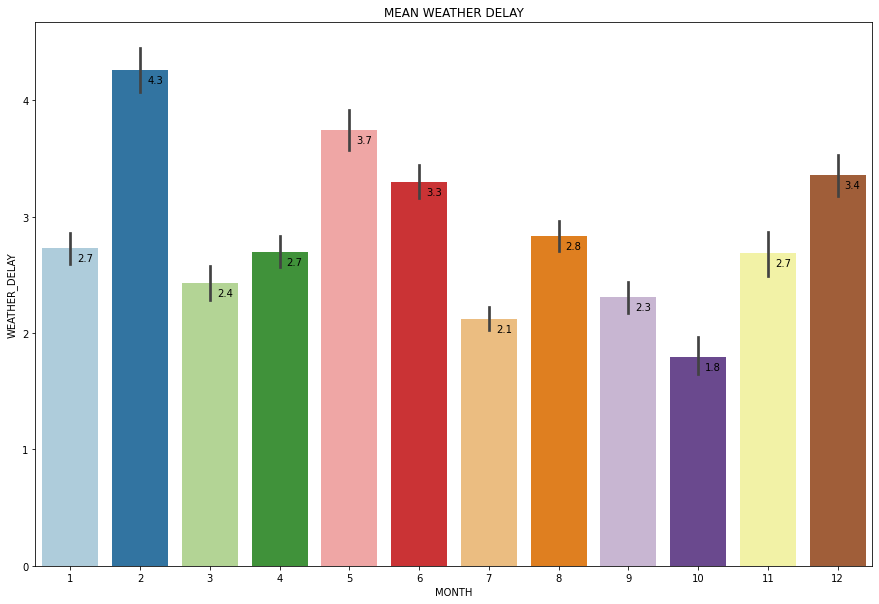

In [121]:
import seaborn as sns 
from numpy import mean
plt.figure(figsize=(15,10))
splot=sns.barplot(x="MONTH", y="WEATHER_DELAY", data=no_null_data, 
                  estimator=mean,palette=sns.color_palette("Paired"))
splot.set_title('MEAN WEATHER DELAY')
#add annotations to each bar showing the heights of the bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (15, -10), 
                   textcoords = 'offset points')

    Your answer: In October we have the least average weather delay. This makes sense as the weather in October in general is not too problematic as the temperatures aren't too hot nor do we have much snow (if any). According to National Climate Report from the USA (https://www.ncdc.noaa.gov/sotc/national/201510) the temperature was above average in October which correlates with good weather and therefore could explain the lower average weather delay.
    In February the average weather delay is the highest. Weather conditions such as snow or heavy rainfall could explain this. And indeed, according to https://en.wikipedia.org/wiki/2014%E2%80%9315_North_American_winter (Article summarizing the North American Winter 2014-2015),  it was very snowy in several states in February. We cite: " According to the National Oceanic and Atmospheric Administration, from February 1 to 28, 2015, 898 lowest minimum temperature records were broken and 91 were tied in the Northeastern United States. In addition, 736 records for the highest snow depth were broken and 138 were tied during the same period."
    
    Note: as this isn't a work about meteorological conditions we think that Wikipedia as a source should suffice.


#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

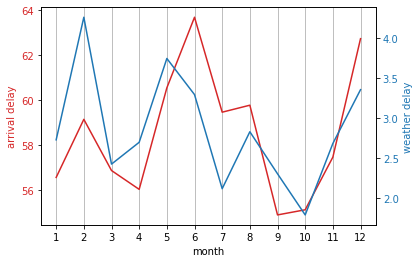

In [122]:
# seaborn does not really want you to plot 2 columns at once (it is possible by melting the dataframe, but this is way to time consuming)
# so lets just do it by hand

# calculate mean of ARRIVAL_DELAY and WEATHER_DELAY for each month
arrival_delay = []
weather_delay = []
for i in range(1,13):
    arrival_delay.append(no_null_data[no_null_data['MONTH'] == i]['ARRIVAL_DELAY'].mean())
    weather_delay.append(no_null_data[no_null_data['MONTH'] == i]['WEATHER_DELAY'].mean())

months = [1,2,3,4,5,6,7,8,9,10,11,12]

# now we can plot the data
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('month')
ax1.set_ylabel('arrival delay', color=color)
ax1.plot(months, arrival_delay, color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks(months)
plt.grid(axis="x")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('weather delay', color=color)  # we already handled the x-label with ax1
ax2.plot(months, weather_delay, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()



In [123]:
print(np.corrcoef(no_null_data['WEATHER_DELAY'],no_null_data['ARRIVAL_DELAY']))# correlation for all data entries
print(np.corrcoef(arrival_delay,weather_delay))#correlation for the monthly average


[[1.         0.26500973]
 [0.26500973 1.        ]]
[[1.         0.60875012]
 [0.60875012 1.        ]]


    Your answer: It is certain that weather delay influences arrival delay by pure logic. This is supported by our visualization. As we stated before, in September and October we have the least average arrival delay. And we see that the average weather delay in these months belongs to the lowest as well. Additionally, for the months with the highest average delay, we see that the average weather delay in these months is also fairly high. At the same time we see that weather delay doesn't fully account for the totality of arrival delay, otherwise we would expect February to be the month with highest average arrival delay.
    All this is supported by the correlation coefficient of weather and arrival delay. Their correlation coefficient is positive but not too elevated. But we have to be careful. Due to the averaging, the visualization leads us to think that the correlation between weather and arrival delay is higher than it actually is. (We see that the correlation coefficient is way higher for the monthly averaged data)
    

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

<AxesSubplot:xlabel='MONTH', ylabel='WEATHER_DELAY'>

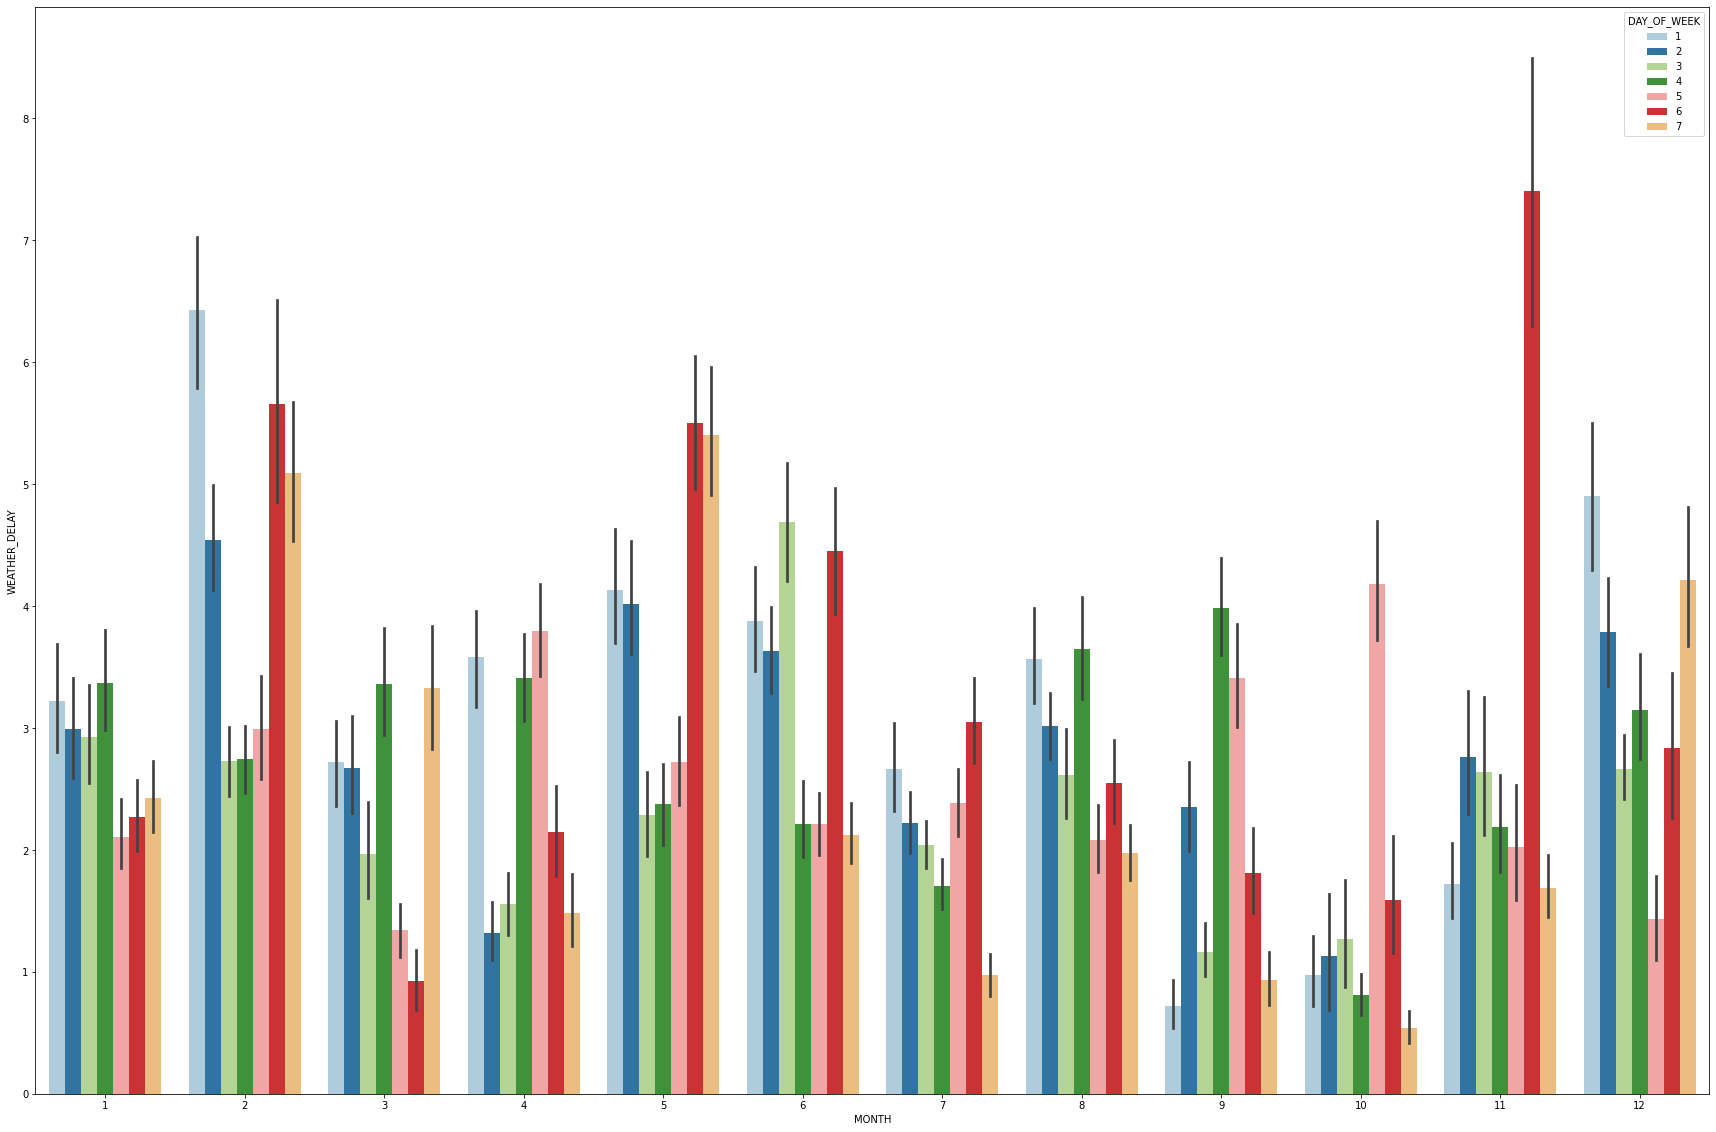

In [124]:
import seaborn as sns 
from numpy import mean
plt.figure(figsize=(30,20))
sns.barplot(x="MONTH", y="WEATHER_DELAY", hue="DAY_OF_WEEK", 
            data=no_null_data, estimator=mean,palette=sns.color_palette("Paired"))

    Your answer:Based on the graph, it is best to avoid Fridays in November (increased traffic because of Thanksgiving could play a role here), May and February. Furthermore one should avoid Sundays in February and Saturdays in May.
    Note: As this is an american dataset, we assumed that the first day of the week is Sunday.


#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

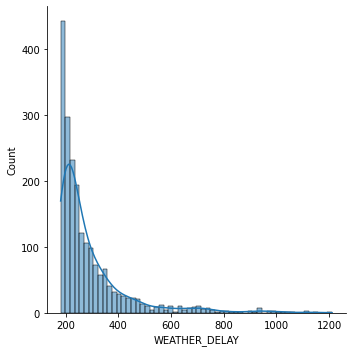

In [125]:
import seaborn as sns 
from numpy import mean
sns.displot(data=no_null_data[no_null_data['WEATHER_DELAY']>180], x='WEATHER_DELAY', kde=True)

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

<AxesSubplot:xlabel='WEATHER_DELAY', ylabel='Density'>

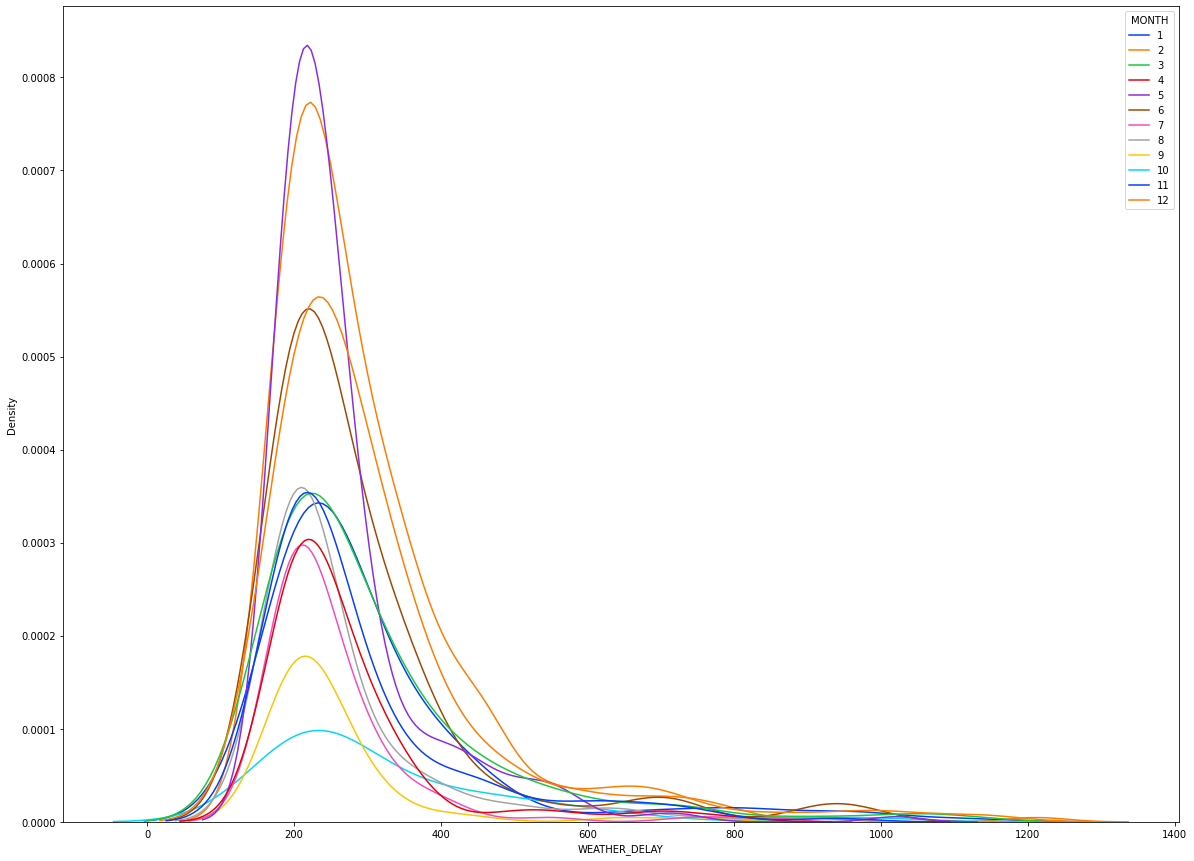

In [126]:
import seaborn as sns 
from numpy import mean
fig, ax=plt.subplots(figsize=(20,15))

sns.kdeplot(ax=ax, data=no_null_data[no_null_data['WEATHER_DELAY']>180], x='WEATHER_DELAY',hue="MONTH", palette=sns.color_palette("bright",12) , multiple="layer")


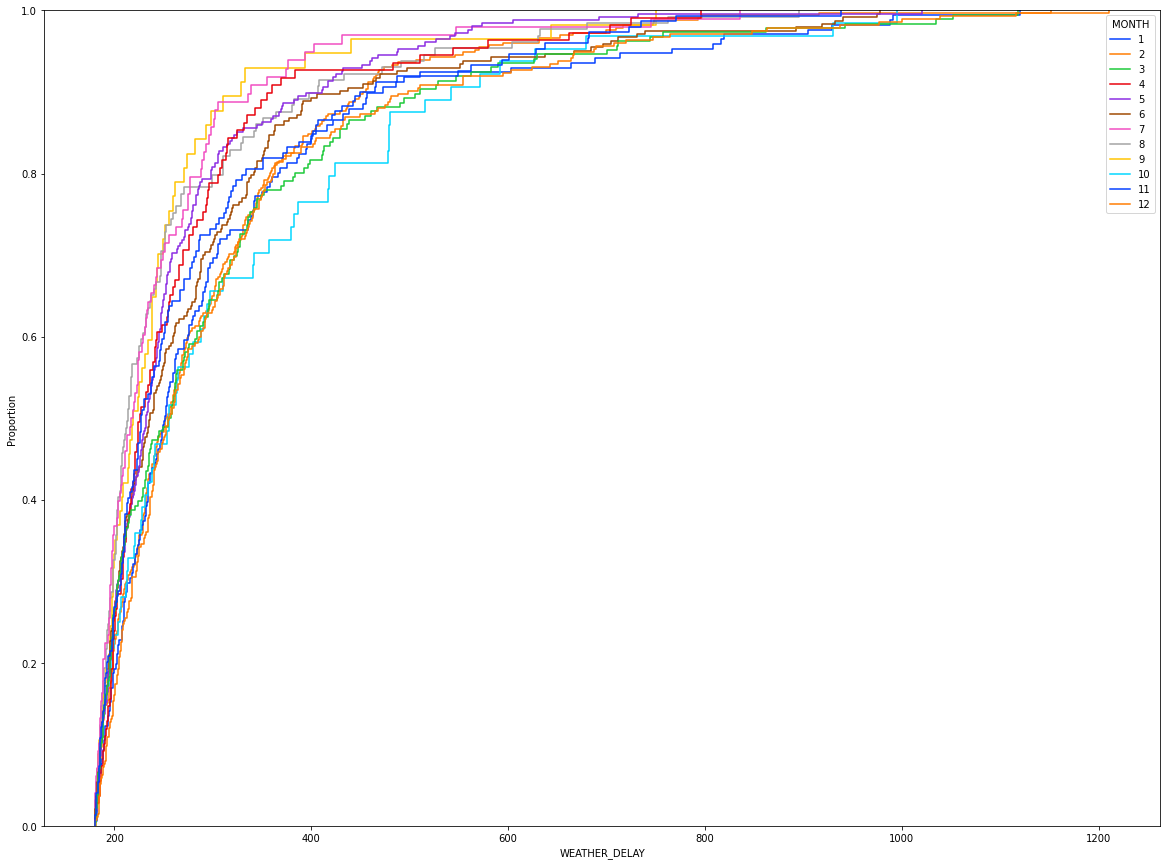

In [23]:
fig, ax=plt.subplots(figsize=(20,15))
sns.ecdfplot(ax=ax, data=no_null_data[no_null_data['WEATHER_DELAY']>=180], palette=sns.color_palette("bright",12) , x='WEATHER_DELAY',hue="MONTH")
plt.show()

    We see that the monthly distribution has more or less the classical bell shape. We see that for each month the distribution has more or less the same mean (where the peak is) but the variance is what differs (how high the peak is). The higher the peak, the more values are close to the mean, thus lesser variance.

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

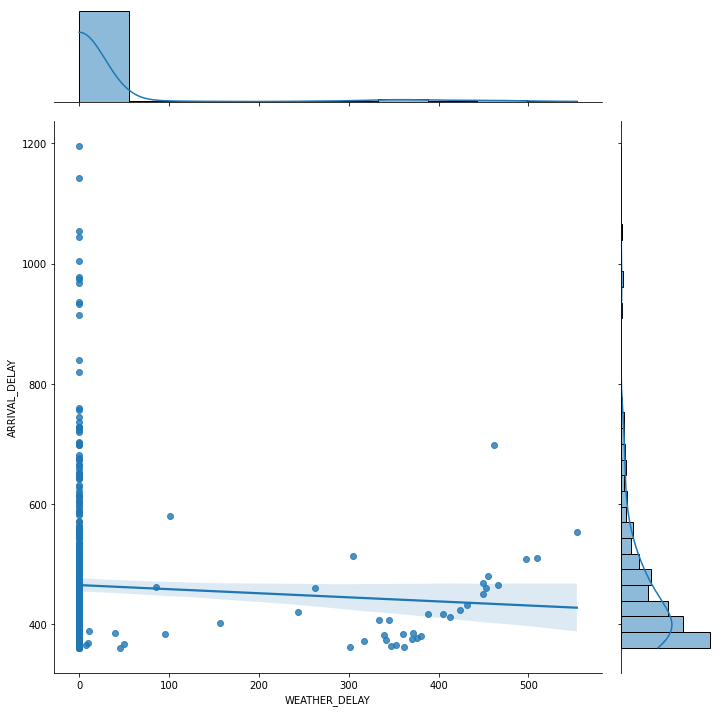

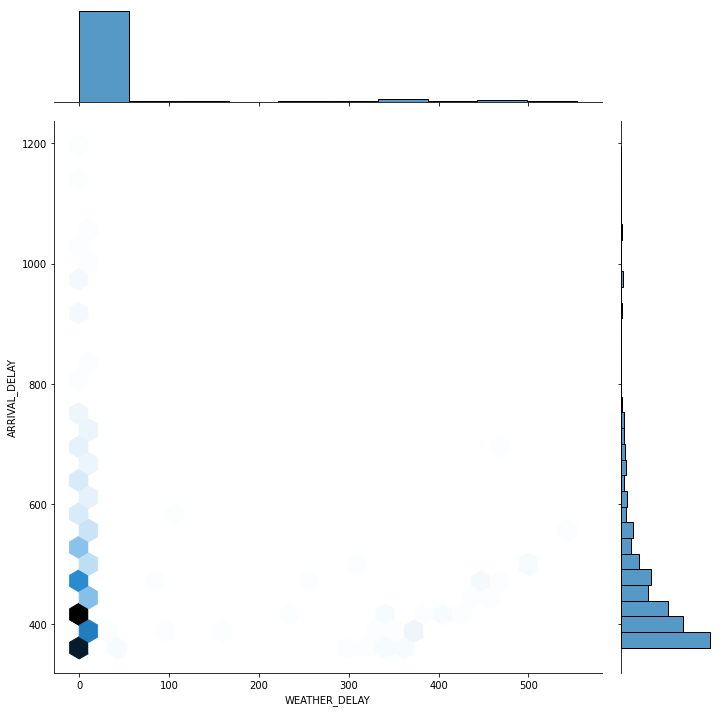

In [127]:
import seaborn as sns 
from numpy import mean
# first we create the dataset of the considered airlines
dataset=no_null_data[no_null_data["AIRLINE"].isin(["EV","VX"])]
sns.jointplot(data=dataset[dataset["ARRIVAL_DELAY"]>360], x="WEATHER_DELAY", y="ARRIVAL_DELAY",height=10, kind="reg")
sns.jointplot(data=dataset[dataset["ARRIVAL_DELAY"]>360], x="WEATHER_DELAY", y="ARRIVAL_DELAY",height=10, kind="hex")

    We see that there are many data points where weather delay is zero. At the same time, these datapoints have very different arrival delays. This is a first indication that arrival delay and weather delay correlate too much (we stated this before). The values for arrival delay are more widespread. Further below we see that the kernel density estimator suggests a distribution close to a bell curve for both features but arrival delay has less variance (higher peak). Most datapoints are accumulated on the lower left of above figure, that means most flights don't have arrival delays over largely over 6h and any weather delays.

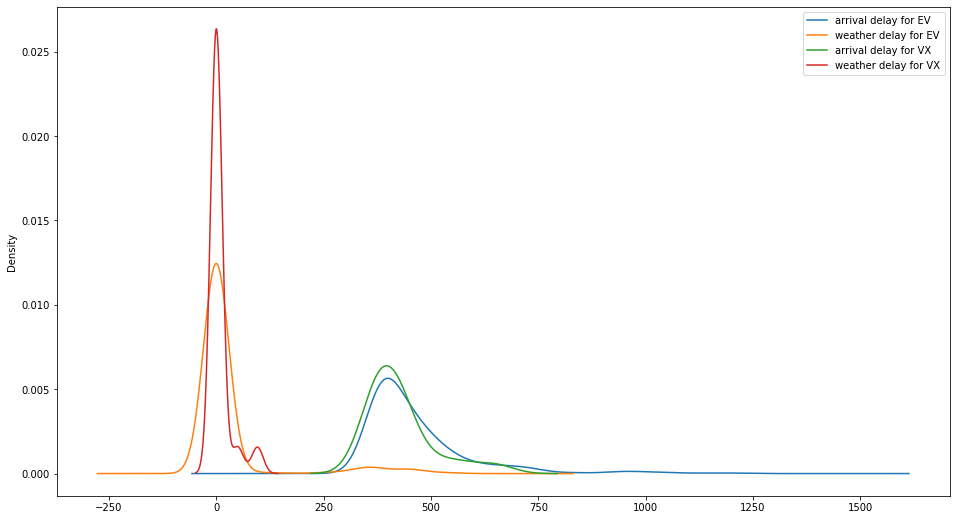

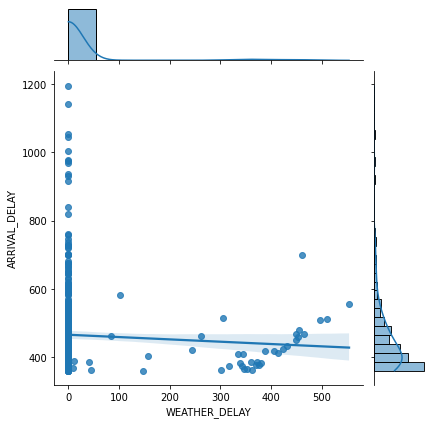

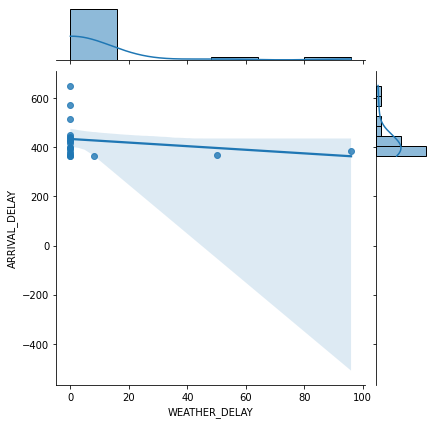

In [128]:
#in order to gain more insights we look at the data from the individual airline
for airline in ["EV", "VX"]:
    no_null_data[(no_null_data["AIRLINE"]==airline) & (no_null_data["ARRIVAL_DELAY"]>360)]["ARRIVAL_DELAY"].plot(
        kind="kde", label="arrival delay for " + airline, legend=True, figsize=(16,9))
    no_null_data[(no_null_data["AIRLINE"]==airline) & (no_null_data["ARRIVAL_DELAY"]>360)]["WEATHER_DELAY"].plot(
        kind="kde", label="weather delay for " + airline, legend=True, figsize=(16,9))

sns.jointplot(x="WEATHER_DELAY", y="ARRIVAL_DELAY", data=no_null_data[(no_null_data["AIRLINE"]=="EV") & (
    no_null_data["ARRIVAL_DELAY"]>=360)], kind="reg")
sns.jointplot(x="WEATHER_DELAY", y="ARRIVAL_DELAY", data=no_null_data[(no_null_data["AIRLINE"]=="VX") & (
    no_null_data["ARRIVAL_DELAY"]>=360)], kind="reg")

       Your answer:We see that the arrival delay for both airlines is estimated to be very similar. Concerning weather delay, the estimated distributions are centered around the same mean but apparently EV had more weather delay, thus a greater spread (higher variance) and therefore the peak is lower than for VX.


## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

In [129]:
import numpy as np
# filtering of the dataset
filtered_dataset=no_null_data[(no_null_data['AIRLINE']=='UA') & (no_null_data['ARRIVAL_DELAY']>0)]
filtered_dataset['DELAY']=np.where(filtered_dataset['ARRIVAL_DELAY']>45,'unacceptable_delay','acceptable_delay')
max_distance=filtered_dataset['DISTANCE'].max()
min_distance=filtered_dataset['DISTANCE'].min()
binning_seperator=(max_distance-min_distance)/2
filtered_dataset['DISTANCE_CATEGORY']=np.where(filtered_dataset['DISTANCE']>min_distance+binning_seperator, 'long','short')
filtered_dataset.head(5)
filtered_dataset.to_csv('output_assignment/filtered_dataset', index=False)


C:\Users\joshu\AppData\Local\Temp/ipykernel_2732/1702313988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['DELAY']=np.where(filtered_dataset['ARRIVAL_DELAY']>45,'unacceptable_delay','acceptable_delay')


#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

In [130]:
columns = filtered_dataset.columns
descriptive_features=filtered_dataset[['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY','DAY_OF_WEEK']].columns
label=columns[-2]#this yields delay category as target
#Converting all the columns to string
for column in columns:
    filtered_dataset[column]= filtered_dataset[column].astype(str)

data_descriptive = filtered_dataset[descriptive_features].values
data_label = filtered_dataset[label].values
#we print the labels in order to check that everything went right
print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)


C:\Users\joshu\AppData\Local\Temp/ipykernel_2732/1319688258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset[column]= filtered_dataset[column].astype(str)


descriptive features:
Index(['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK'], dtype='object')

target feature:
DELAY


In [131]:
import pip
pip.main(['install', 'p_decision_tree'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


C:\Users\joshu\Anaconda3\envs\env-IDS2021\lib\site-packages\pip\_vendor\packaging\version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


0

In [132]:
#build the tree
from p_decision_tree.DecisionTree import DecisionTree

decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

decisionTree.id3(0,1000)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )


#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer: As we can observe, in the first round the tree is split according to SCHEDULED_DEPARTURE_CATEGORY. In the second round the tree is split according to the DAY_OF_WEEK category. Therefore DAY_OF_WEEK is the best feature based on entropy in the second round.
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer: We see that flights on Sunday (1st day of week) evening lead mostly to unacceptable delays, no matter the distance category. The same is true for flights on Monday afternoon.


## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [30]:
# imports for question 3
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [31]:
# load and inspect data
pd.set_option('display.max_columns', None)
data = pd.read_csv("flights_classifying.csv")
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DAY_YEARLY,WEEK,SCHEDULED_DEPARTURE_CATEGORY,REIMBURSMENT
0,0,661456,719293,2015,7,18,6,DL,1962,N974AT,DTW,PHL,852,843.0,-9.0,46.0,929.0,100.0,130.0,81.0,453,1050.0,3.0,1032,1053.0,21.0,0,0,N,21.0,0.0,0.0,0.0,0.0,199,28,Morning,0
1,1,110441,149900,2015,6,30,2,OO,5157,N768SK,IAH,TUS,2110,2222.0,72.0,10.0,2232.0,148.0,127.0,113.0,936,2225.0,4.0,2138,2229.0,51.0,0,0,N,0.0,0.0,0.0,51.0,0.0,181,25,Evening,0
2,2,129096,802487,2015,5,12,2,EV,2632,N684JW,SHV,DFW,1640,1650.0,10.0,5.0,1655.0,64.0,70.0,50.0,190,1745.0,15.0,1744,1800.0,16.0,0,0,N,6.0,0.0,1.0,9.0,0.0,132,18,Afternoon,0
3,3,850373,443114,2015,3,26,4,B6,2324,N284JB,MCO,DCA,830,824.0,-6.0,16.0,840.0,125.0,159.0,139.0,759,1059.0,4.0,1035,1103.0,28.0,0,0,N,28.0,0.0,0.0,0.0,0.0,85,12,Morning,0
4,4,731006,116526,2015,5,30,6,MQ,3052,N622MQ,DFW,SPS,1700,1812.0,72.0,43.0,1855.0,60.0,77.0,28.0,113,1923.0,6.0,1800,1929.0,89.0,0,0,N,17.0,0.0,0.0,63.0,9.0,150,21,Afternoon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579504,579504,210186,625507,2015,5,8,5,AA,2355,N200AA,OKC,DFW,1712,1430.0,1278.0,17.0,1447.0,63.0,73.0,44.0,175,1531.0,12.0,1815,1543.0,1288.0,0,0,N,10.0,0.0,0.0,257.0,1021.0,128,18,Afternoon,1
579505,579505,146183,239740,2015,7,10,5,DL,1616,N914DN,DEN,ATL,740,1319.0,339.0,12.0,1331.0,175.0,172.0,150.0,1199,1801.0,10.0,1235,1811.0,336.0,0,0,N,0.0,0.0,336.0,0.0,0.0,191,27,Morning,1
579506,579506,873736,267841,2015,12,2,3,NK,631,N636NK,DTW,TPA,1835,2258.0,263.0,27.0,2325.0,155.0,166.0,133.0,983,138.0,6.0,2110,144.0,274.0,0,0,N,11.0,0.0,0.0,263.0,0.0,336,48,Evening,1
579507,579507,712041,357011,2015,11,7,6,WN,3332,N225WN,GRR,RSW,1525,1834.0,189.0,10.0,1844.0,175.0,175.0,152.0,1147,2116.0,13.0,1820,2129.0,189.0,0,0,N,0.0,0.0,189.0,0.0,0.0,311,44,Afternoon,1


Randomly order the data points using one of the group member's students as the random state.

In [32]:
data_rand_order = data.sample(frac=1, random_state=377818)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [33]:
# drop rows with null values
data_no_null = data_rand_order.dropna()
# only choose not canceled flights
data_no_canceled = data_no_null.loc[data_no_null["CANCELLED"]==0]
# design target feature
data_no_canceled["TARGET"] = (data_no_canceled["ARRIVAL_DELAY"]>180).astype(int)
# define target feature
target_feature = data_no_canceled["TARGET"]

In [34]:
# check if its even true, that all flights that have a delay of more than 180 minutes are marked as reimbursed
(data_no_null["REIMBURSMENT"]==1).equals(data_no_null["ARRIVAL_DELAY"]>180)

True

In [35]:
data_no_null.to_csv("output_assignment/flights_classifying_with_target.csv")

In [36]:
target_feature.to_csv("output_assignment/target_feature.csv")

#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

In [37]:
# lets first check which features we have
data_no_canceled.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'YEAR', 'MONTH', 'DAY',
       'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DAY_YEARLY', 'WEEK', 'SCHEDULED_DEPARTURE_CATEGORY',
       'REIMBURSMENT', 'TARGET'],
      dtype='object')

In [38]:
# which features should we even consider as descriptive features? (features marked with "x" are selected for further insepction)

#   - name                              decision (x)    comment         

#   - all "unnamed"                                     not useful
#   - 'YEAR'                                            makes no sense (alwyas the same year)  
#   - 'MONTH'                           x
#   - 'DAY',                            x
#   - 'DAY_OF_WEEK'                     x
#   - 'AIRLINE'                         x
#   - 'FLIGHT_NUMBER'                                   to unique
#   - 'TAIL_NUMBER'                                     to unique
#   - 'ORIGIN_AIRPORT'                  x
#   - 'DESTINATION_AIRPORT'             x
#   - SCHEDULED_DEPARTURE'              x
#   - 'DEPARTURE_TIME'                                  unknown before
#   - 'DEPARTURE_DELAY'                                 unknown before
#   - 'TAXI_OUT'                                        unknown before
#   - 'WHEELS_OFF'                                      unknown before
#   - 'SCHEDULED_TIME'                  x
#   - 'ELAPSED_TIME'                                    unknown before
#   - 'AIR_TIME'                                        unknown before
#   - 'DISTANCE'                        x
#   - 'WHEELS_ON'                                       unknown before
#   - 'TAXI_IN'                                         unknown before
#   - 'SCHEDULED_ARRIVAL'               x
#   - 'ARRIVAL_TIME'                                    unknown before
#   - all delay and cancellation data                   unknown before
#   - 'DAY_YEARLY'                      x
#   - 'WEEK'                            x
#   - 'SCHEDULED_DEPARTURE_CATEGORY'    x
#   - 'REIMBURSMENT'                                    unknown before

In [39]:
# which features should we choose as descripitve features in the model? (features marked with "x" are finally selected as descriptive features)

#   - name                              decision (x)    comment                                                                                 

#   - 'MONTH'                           x
#   - 'DAY',                                            comb. of "WEEK" and "DAY_OF_WEEK" contains the same info
#   - 'DAY_OF_WEEK'                     x
#   - 'AIRLINE'                         x
#   - 'ORIGIN_AIRPORT'                  x               one-hot encoding necessary
#   - 'DESTINATION_AIRPORT'             x               one-hot encoding necessary
#   - SCHEDULED_DEPARTURE'                              to specific, lets just use "SCHEDULED_DEPARTURE_CATEGORY"
#   - 'SCHEDULED_TIME'                  x
#   - 'DISTANCE'                        x
#   - 'SCHEDULED_ARRIVAL'                               to specific, combi of "SCHEDULED_DEPARTURE_CATEGORY" and 'SCHEDULED_TIME' hold similar info
#   - 'DAY_YEARLY'                                      comb. of "WEEK" and "DAY_OF_WEEK" contains the same info
#   - 'WEEK'                            x
#   - 'SCHEDULED_DEPARTURE_CATEGORY'    x

In [40]:
descriptive_features_list = ["MONTH", "DAY_OF_WEEK", "AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "SCHEDULED_TIME", "DISTANCE", "WEEK", "SCHEDULED_DEPARTURE_CATEGORY"]
# choose those features from dataset
descriptive_features_init = data_no_canceled[descriptive_features_list]

In [41]:
# map SCHEDULED_DEPARTURE_CATEGORY values Morning, Afternoon, Evening and Night to 0, 1, 2 and 3
def encoding(row):  
    if row['SCHEDULED_DEPARTURE_CATEGORY']=="Morning":
        return 0
    elif row['SCHEDULED_DEPARTURE_CATEGORY']=="Afternoon":
        return 1
    elif row['SCHEDULED_DEPARTURE_CATEGORY']=="Evening":
        return 2
    elif row['SCHEDULED_DEPARTURE_CATEGORY']=="Night":
        return 3

In [42]:
descriptive_features = descriptive_features_init.copy()
descriptive_features["SCHEDULED_DEPARTURE_CATEGORY_ENCODED"] = descriptive_features_init.apply(lambda row: encoding(row), axis=1)
descriptive_features.drop("SCHEDULED_DEPARTURE_CATEGORY", axis=1, inplace=True)

In [43]:
# one hot encoding (for categorical features AIRLINE, ORIGIN_AIRPORT, DESTINATION_AIRPORT)

# we explicitly do not one-hot encode all date/time data, because we want to keep the relations (e.g. Monday is closer to Tuesday than to Wednesday)
# and prevent to get to many dimensions. It would of course be smart to encode cylic features in a different way (e.g. Sunday should be as close to Monday as to Saturday),
# but this seems to go beyond the scope of this assignment and also we want to prevent us from unintenionally changing the meaning of the data

descriptive_features_one_hot = pd.get_dummies(descriptive_features)

In [44]:
# now we want to scale all features, that ar not one-hot encoded ("MONTH", "DAY_OF_WEEK", "SCHEDULED_TIME", "DISTANCE", "WEEK") to [0,1]
# this is especially important for the neural network to learn properly
feature_scaling_list = ["MONTH", "DAY_OF_WEEK", "SCHEDULED_TIME", "DISTANCE", "WEEK", "SCHEDULED_DEPARTURE_CATEGORY_ENCODED"]
scaler = MinMaxScaler()
for feature in feature_scaling_list:
    descriptive_features_one_hot[feature+"_SCALED"] = scaler.fit_transform(descriptive_features_one_hot[feature].values.reshape(-1,1))
descriptive_features_one_hot.drop(feature_scaling_list, axis=1, inplace=True)

In [45]:
descriptive_features_one_hot.to_csv("output_assignment/descriptive_features.csv")

In [46]:
# split data into delay > 3h and delay < 3h
data_delay3_0 = data_no_canceled[data_no_canceled["TARGET"]==0]
data_delay3_1 = data_no_canceled[data_no_canceled["TARGET"]==1]

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [47]:
descriptive_train, descriptive_test, target_train, target_test = train_test_split(descriptive_features_one_hot, target_feature, test_size=0.85, random_state=377818, stratify=target_feature)

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

    Our goal is to choose a flight that should be delayed for more than 3h with a probability that is as big as possible. Therefore we aim for a high precision.
    

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

    As most of the flights are delayed by less than 3h we can reach a high accuracy by simply guessing "delay < 3h" for any flight. In our data set that accuracy would be:

In [48]:
print(round(data_delay3_0.shape[0]/data_no_canceled.shape[0]*100, 2), "%")


92.8 %


    However, we use not accuracy but precision as our metric. The precision for method desribed above cannot be calculated, and it is trivial that it doesn't make sense to calculate how good we have identified the "delay > 3h" cases, if we dont guess for that cases in the first place. 
    If we have no model to use we can just guess random ("delay < 3h" in 50% of the cases and "delay > 3h" in the other 50%). Than we will achieve a precision of:

In [49]:
rand_target_test_pred = np.random.choice(np.array([0,1]), size=len(target_test))
rand_cm = confusion_matrix(target_test, rand_target_test_pred)
rand_prec = rand_cm[1][1]/(rand_cm[0][1] + rand_cm[1][1])
print(round(rand_prec*100, 2), "%")

7.19 %


    This is our baseline that we can compare our model's performance against.
    
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


    We perform k-fold cross-validation, which is built in the GridSearchCV. We choose a k of 5, which is the default for many algorithms and seems to be a reasonable choice here as well, as we don't want to stretch the time for training too much.

#### a) Regression:
Train, finetune and evaluate a regression model.

In [50]:
# define parameters
lreg_param_grid = {
    "C": [0.001, 0.1, 1.0],
    "class_weight": ["balanced"],
    "solver": ["liblinear", "newton-cg"]
}
# train model
lreg = GridSearchCV(LogisticRegression(), lreg_param_grid, scoring="precision", cv=5)#, verbose=3)
lreg.fit(descriptive_train, target_train)

print(lreg.best_params_)

{'C': 0.1, 'class_weight': 'balanced', 'solver': 'newton-cg'}


In [51]:
# test model
lreg_target_test_pred = lreg.predict(descriptive_test)
lreg_cm = confusion_matrix(target_test, lreg_target_test_pred)
print(lreg_cm)
lreg_prec = lreg_cm[1][1]/(lreg_cm[0][1] + lreg_cm[1][1])

print(classification_report(target_test, lreg_target_test_pred))

print("The regression model reaches a precision of", round(lreg_prec*100, 2), "%")
print("This is a", round((lreg_prec-rand_prec)*100, 2), "% improvement over random guessing")

[[245652 168949]
 [ 13799  18347]]
              precision    recall  f1-score   support

           0       0.95      0.59      0.73    414601
           1       0.10      0.57      0.17     32146

    accuracy                           0.59    446747
   macro avg       0.52      0.58      0.45    446747
weighted avg       0.89      0.59      0.69    446747

The regression model reaches a precision of 9.8 %
This is a 2.61 % improvement over random guessing


#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [52]:
# define parameters
svc_param_grid = {
    "C": [0.1, 0.5, 1.0],
    "kernel": ["rbf", "linear"],
    "gamma": ["auto", "scale"],
    "class_weight": ["balanced"],
}
# train model
svc = GridSearchCV(SVC(), svc_param_grid, scoring="precision", cv=5) #, verbose=3)
svc.fit(descriptive_train[:10000], target_train[:10000])

print(svc.best_params_)

/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn

{'C': 0.5, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}


In [53]:
# test model
svc_target_test_pred = svc.predict(descriptive_test)
svc_cm = confusion_matrix(target_test, svc_target_test_pred)
print(svc_cm)
svc_prec = svc_cm[1][1]/(svc_cm[0][1] + svc_cm[1][1])

print(classification_report(target_test, svc_target_test_pred))

print("The SVM model reaches a precision of", round(svc_prec*100, 2), "%")
print("This is a", round((svc_prec-rand_prec)*100, 2), "% improvement over random guessing")

[[183382 231219]
 [ 10144  22002]]
              precision    recall  f1-score   support

           0       0.95      0.44      0.60    414601
           1       0.09      0.68      0.15     32146

    accuracy                           0.46    446747
   macro avg       0.52      0.56      0.38    446747
weighted avg       0.89      0.46      0.57    446747

The SVM model reaches a precision of 8.69 %
This is a 1.5 % improvement over random guessing


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [54]:
# Problem: The data is not balanced. There are way more delays of > 3h than delays of < 3h (way more target = 0 than target = 1).
# Solution: le the training data.
# by that we also reduce the amount of input data points in the training phase (NN training is - as SVM training - computationally quite expensive)

# let's start with the target data
# choose as many target = 0 data points as there are target = 1 data points
target_train_downsamp = target_train.loc[target_train==0][:target_train.value_counts()[1]]
# add all target = 0 data points
target_train_downsamp = target_train_downsamp.append(target_train[target_train==1])
# mix everything up
target_train_downsamp = target_train_downsamp.sample(frac=1, random_state=377818)
# voilà!

# choose the identical data points in the descriptive data
descriptive_train_downsamp = descriptive_train.filter(target_train_downsamp.index, axis=0)

In [55]:
# define parameters
mlp_param_grid = {
    "hidden_layer_sizes":[(100,), (4,4,2,), (4,8,2,), (16,16,)],
    "activation": ["logistic", "relu"],
    "learning_rate_init":[0.001, 0.01],
    "max_iter": [100,200]
}
# train model
mlp = GridSearchCV(MLPClassifier(), mlp_param_grid, scoring="precision", cv=5) #, verbose=3)
mlp.fit(descriptive_train_downsamp, target_train_downsamp)

print(mlp.best_params_)

/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt

/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt

/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt

/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt

{'activation': 'logistic', 'hidden_layer_sizes': (4, 4, 2), 'learning_rate_init': 0.001, 'max_iter': 100}


In [56]:
# test model
mlp_target_test_pred = mlp.predict(descriptive_test)
mlp_cm = confusion_matrix(target_test, mlp_target_test_pred)
print(mlp_cm)
mlp_prec = mlp_cm[1][1]/(mlp_cm[0][1] + mlp_cm[1][1])

print(classification_report(target_test, mlp_target_test_pred))

print("The SVM model reaches a precision of", round(mlp_prec*100, 2), "%")
print("This is a", round((mlp_prec-rand_prec)*100, 2), "% improvement over random guessing")

[[271815 142786]
 [ 15977  16169]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.77    414601
           1       0.10      0.50      0.17     32146

    accuracy                           0.64    446747
   macro avg       0.52      0.58      0.47    446747
weighted avg       0.88      0.64      0.73    446747

The SVM model reaches a precision of 10.17 %
This is a 2.99 % improvement over random guessing


### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [57]:
print("Precision of random guessing:", round(rand_prec*100, 2), "%. Flight price for which the model is profitable:", round(rand_prec*150, 2), "€.")
print("Precision of regression model:", round(lreg_prec*100, 2), "%. Flight price for which the model is profitable:", round(lreg_prec*150, 2), "€.")
print("Precision of SVM model:", round(svc_prec*100, 2), "%. Flight price for which the model is profitable:", round(svc_prec*150, 2), "€.")
print("Precision of MLP model:", round(mlp_prec*100, 2), "%. Flight price for which the model is profitable:", round(mlp_prec*150, 2), "€.")

Precision of random guessing: 7.19 %. Flight price for which the model is profitable: 10.78 €.
Precision of regression model: 9.8 %. Flight price for which the model is profitable: 14.69 €.
Precision of SVM model: 8.69 %. Flight price for which the model is profitable: 13.03 €.
Precision of MLP model: 10.17 %. Flight price for which the model is profitable: 15.26 €.


    We see, that all our models are better than the baseline that we can reach by random guessing. The MLP model performes best, followed by the regression model. The SVM model performes worst.
    We can only beat the baseline by a few percent resulting in flight prices of just over 10 € for which our models are profitable. However, this is not a big surprise, since - if accurate predictions could be made with such rudimentary models - every airline would have already implemented profound changes which would then make these very predictions no longer possible. Not to mention that smart data scientists would by flying around the world for free. 

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [58]:
clustering_dataset=no_null_data.loc[(no_null_data['WEATHER_DELAY']<=600) & (no_null_data['LATE_AIRCRAFT_DELAY']<=600)]
clustering_dataset['AIR_TIME_DELAY']=clustering_dataset['ELAPSED_TIME']-clustering_dataset['SCHEDULED_TIME']
print(clustering_dataset.shape)
display(clustering_dataset[['AIR_TIME_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME']].head(10))
clustering_dataset.to_csv('clustering_dataset', index=False)


(808119, 36)


/var/folders/63/tr050f0d4p511hwvr1mrpzn80000gn/T/ipykernel_6940/1315184606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_dataset['AIR_TIME_DELAY']=clustering_dataset['ELAPSED_TIME']-clustering_dataset['SCHEDULED_TIME']


,AIR_TIME_DELAY,SCHEDULED_TIME,ELAPSED_TIME
217500,5.0,90.0,95.0
594129,21.0,219.0,240.0
271175,-15.0,90.0,75.0
467048,5.0,120.0,125.0
258721,-21.0,150.0,129.0
872278,2.0,65.0,67.0
386408,22.0,61.0,83.0
136883,-15.0,213.0,198.0
485198,7.0,371.0,378.0
203189,5.0,328.0,333.0


    Your answer: Negative values of airtime delay correspond to a catching up of delay, i.e. the flight went quicker than anticipated. Consequently, positive values of air time delay mean that the flight took longer than scheduled. 
    

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [59]:
#here we perform the clustering
import numpy as np
from sklearn.cluster import KMeans
cluster_num = 5
kmeans = KMeans(n_clusters=cluster_num, n_init=5
               ).fit(clustering_dataset[['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']])#n_init ensures that the algorithm runs at least 5 times


In [60]:
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_
clustering_dataset = clustering_dataset.assign(cluster=clusters)#assign cluster label to data points
#rename them according to the task instruction
for i in range(5):
    clustering_dataset.loc[(clustering_dataset["cluster"]==i), "cluster"] = "c"+str(i+1)
#quick overview of the data to see if it worked as intended
clustering_dataset.head(3)
#count the elements in each cluster
for i in range(1,6):
    print("Number of datapoints in cluster c{}: {}".format(i, len(clustering_dataset.loc[clustering_dataset["cluster"]=="c"+str(i)])))
#creating of a dataframe for nicer display
index=['c1', 'c2', 'c3', 'c4', 'c5']
centroidtable=pd.DataFrame(centroids, columns=['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'],index=index)
print(centroidtable)

Number of datapoints in cluster c1: 434885
Number of datapoints in cluster c2: 26653
Number of datapoints in cluster c3: 122700
Number of datapoints in cluster c4: 8242
Number of datapoints in cluster c5: 215639
    AIR_TIME_DELAY  WEATHER_DELAY  LATE_AIRCRAFT_DELAY
c1       -5.076787       1.227017            10.344108
c2       -4.094032       2.424756           189.112949
c3       -3.431372       1.111170            70.929005
c4        8.888484     149.844800             8.381871
c5       27.277682       1.394358             2.474044


    Your answer: Now it remains to explain why running the algorithm with different centroids seeds is necessary. KMeans is an algorithm that is guaranteed to converge but only to a local minimum. The algorithm does not guarantee convergence to the global optimum. Furthermore, the solution of KMeans depends on the initial cluster. That means that different initial clusters could lead to different solutions. Therefore it is necessary to run the algorithm with different centroid seeds. After these runs, we select the clustering that led to the best solution of the underlying optimization problem.
    

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

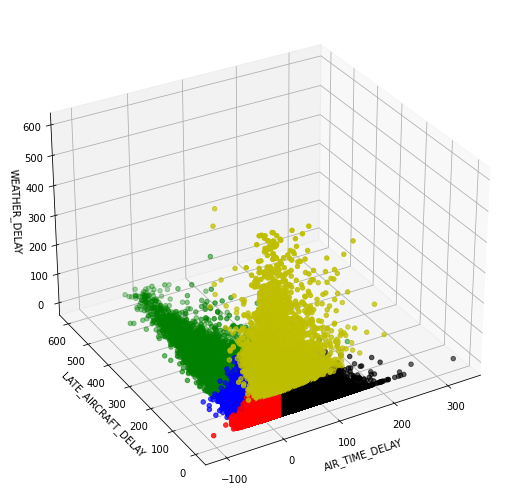

In [61]:


LABEL_COLOR_MAP = {0 : 'r',
          1 : 'g',
          2 : 'b',
          3 : 'y',
          4 : 'k'}
label_color = [LABEL_COLOR_MAP[l] for l in clusters]

fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection='3d')
xdata = clustering_dataset['AIR_TIME_DELAY']
ydata = clustering_dataset['LATE_AIRCRAFT_DELAY']
zdata = clustering_dataset['WEATHER_DELAY']
ax.set_xlabel("AIR_TIME_DELAY")
ax.set_ylabel("LATE_AIRCRAFT_DELAY")
ax.set_zlabel("WEATHER_DELAY")
ax.scatter3D(xdata, ydata, zdata, c=label_color)
ax.view_init(30,-120)

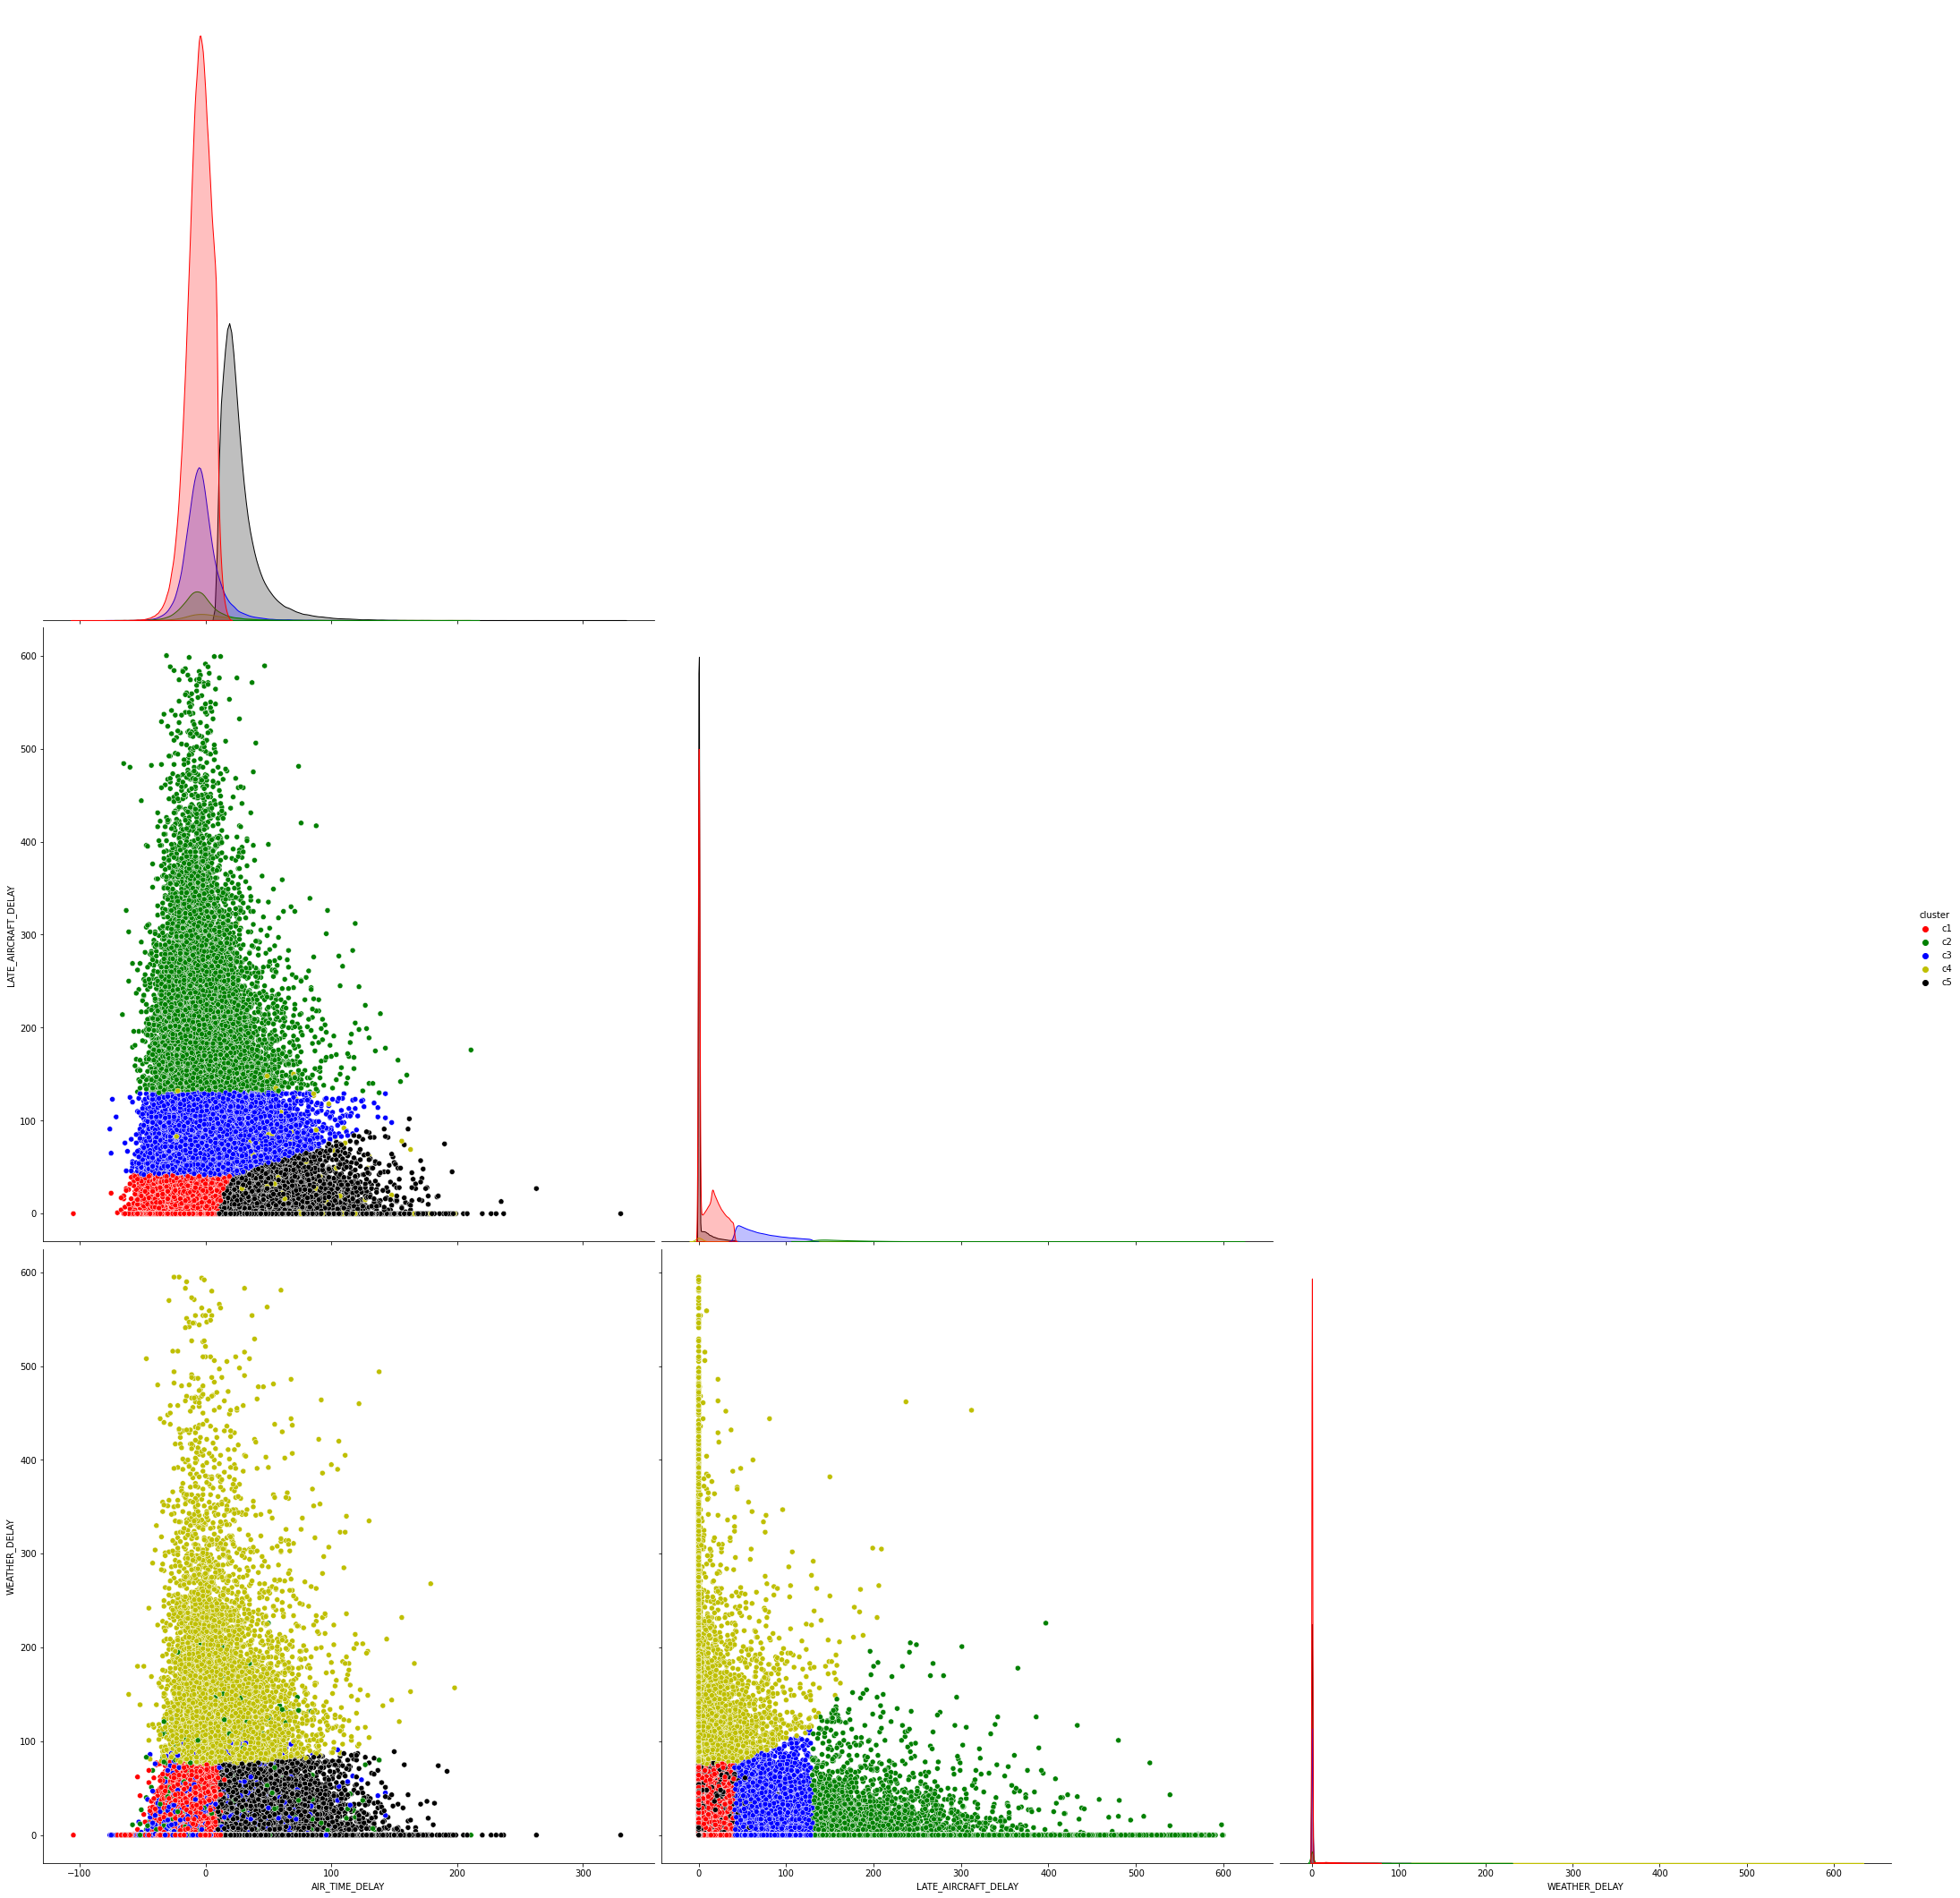

In [62]:
import seaborn as sns
sns.pairplot(data=clustering_dataset, vars=['AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],height=10,palette=[
    'r','g','b','y','k'], hue="cluster",hue_order=['c1','c2','c3','c4','c5'], corner=True)

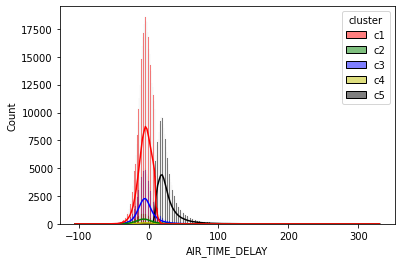

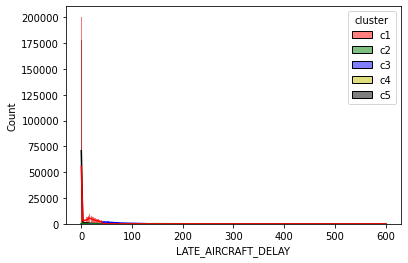

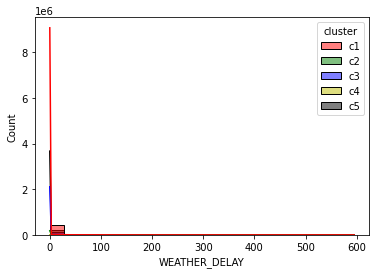

In [63]:
#take a look at the distribution for each single feature
sns.histplot(data=clustering_dataset, x='AIR_TIME_DELAY', palette=[
    'r','g','b','y','k'], hue="cluster",hue_order=['c1','c2','c3','c4','c5'], kde=True)
plt.show()
sns.histplot(data=clustering_dataset, x='LATE_AIRCRAFT_DELAY', palette=[
    'r','g','b','y','k'], hue="cluster",hue_order=['c1','c2','c3','c4','c5'], kde=True)
plt.show()
sns.histplot(data=clustering_dataset, x='WEATHER_DELAY', palette=[
    'r','g','b','y','k'], hue="cluster",hue_order=['c1','c2','c3','c4','c5'], kde=True)
plt.show()

In [64]:
 clustering_dataset[['AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','cluster']].groupby('cluster').describe()

AIR_TIME_DELAY                                                        \
                 count       mean        std    min   25%   50%   75%    max   
cluster                                                                        
c1            434885.0  -5.083673   9.446228 -105.0 -11.0  -4.0   2.0   19.0   
c2             26653.0  -4.131317  16.586398  -66.0 -13.0  -6.0   2.0  211.0   
c3            122700.0  -3.424678  13.884432  -76.0 -12.0  -5.0   3.0  148.0   
c4              8242.0   8.889469  25.362505  -61.0  -8.0   3.0  19.0  198.0   
c5            215639.0  27.266751  16.853469   10.0  17.0  23.0  32.0  330.0   

        LATE_AIRCRAFT_DELAY                                              \
                      count        mean        std    min    25%    50%   
cluster                                                                   
c1                 434885.0   10.364621  12.241824    0.0    0.0    4.0   
c2                  26653.0  189.791618  62.774009  130.0  146.0  170.0   
c3                 122700.0   71.154417  23.876068   41.0   51.0   65.0   
c4                   8242.0    8.386435  21.780636    0.0    0.0    0.0   
c5                 215639.0    2.484268   7.296458    0.0    0.0    0.0   

                      WEATHER_DELAY                                            \
           75%    max         count        mean        std   min   25%    50%   
cluster                                                                         
c1        19.0   41.0      434885.0    1.227272   6.946967   0.0   0.0    0.0   
c2       211.0  600.0       26653.0    2.450081  11.714545   0.0   0.0    0.0   
c3        87.0  130.0      122700.0    1.107368   6.494770   0.0   0.0    0.0   
c4         3.0  312.0        8242.0  149.835962  79.380026  75.0  96.0  124.0   
c5         0.0  102.0      215639.0    1.394080   7.326383   0.0   0.0    0.0   

                       
           75%    max  
cluster                
c1         0.0   78.0  
c2         0.0  226.0  
c3         0.0  112.0  
c4       176.0  595.0  
c5         0.0   89.0

We see that the distribution of airtime delay for each cluster is centered more or less around the same point. The distribution has a bell shape for each cluster. c5 is a little exception here with a mean of approx. 27 whereas the other clusters are distributed more around 0. The standard deviation is also comparable. c1 has the least std which we could already see from the graphs as the distribution of airtime delay for c1 has the highest peak.
For the other features we notice a bigger difference in the distributions.
    Late aircraft delay: we see that c2 and c3 have fairly elevated means. From the graphs we see that clustering took place across this dimension. The cluster c2 consists of the flights with most late aircraft delay and c3 consists of flights with slightly elevated (compared to c1,c4,c5) late aircraft delay. Clusters c1,c4 and c5 have their mean close to 0.
    Weather delay: Here all distributions are very similar except for c4 with  way higher mean and variance. This indicates that a clustering took place across this dimension (between c4 and the rest). The flights in c4 are those with significant weather delay.
    In summary, the clustering can be explained as such: first we separate the flights according to weather delay. Those with significant weather delay get the label c4. In order to differentiate between the others, more features have to be taken into account. After that we separate according late aircraft delay. Flights with high values for this feature get the label c2 and those with lesser but still elevated values get the label c3. Now only 2 labels remain to assign. This separation is done according to air time delay. The remaining flights get separated according to air time delay. Those with higher air time delay get the label c5 and the others get the label c1.
